In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
# define the class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Training images shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing images shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing images shape: (10000, 28, 28)
Testing labels shape: (10000,)


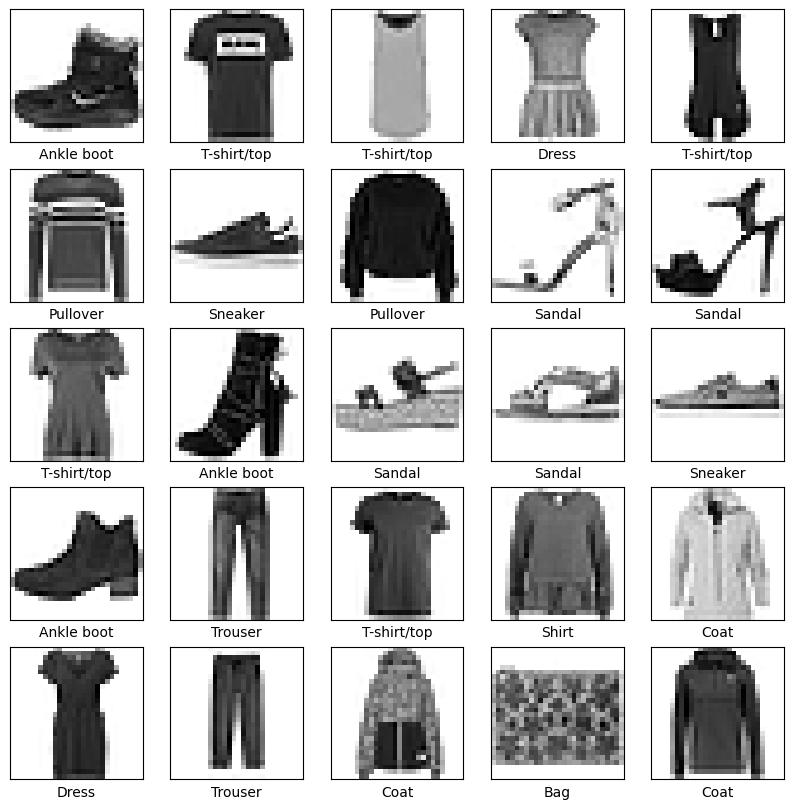

In [7]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [8]:
# normalize images -> pixel between 0 and 255 -> value between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# reshape for CNN network
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Fashion MNIST dataset classes
num_classes = 10
batch_size = 500
epochs = 10

In [9]:
# define a model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

d:\projects\github\learning\recommendation\recommendation\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# compile the model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# earlystopping preventing from overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# fit a model
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    callbacks=[early_stopping])

Epoch 1/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.5585 - loss: 1.2610 - val_accuracy: 0.8007 - val_loss: 0.5239
Epoch 2/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8007 - loss: 0.5462 - val_accuracy: 0.8394 - val_loss: 0.4380
Epoch 3/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8350 - loss: 0.4633 - val_accuracy: 0.8569 - val_loss: 0.3897
Epoch 4/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8532 - loss: 0.4156 - val_accuracy: 0.8676 - val_loss: 0.3649
Epoch 5/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8635 - loss: 0.3823 - val_accuracy: 0.8726 - val_loss: 0.3489
Epoch 6/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8705 - loss: 0.3650 - val_accuracy: 0.8777 - val_loss: 0.3353
Epoch 7/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8765 - loss: 0.3426 - val_accuracy: 0.8812 - val_loss: 0.3263
Epoch 8/10
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.8805 - loss: 0.3332 - val_accu

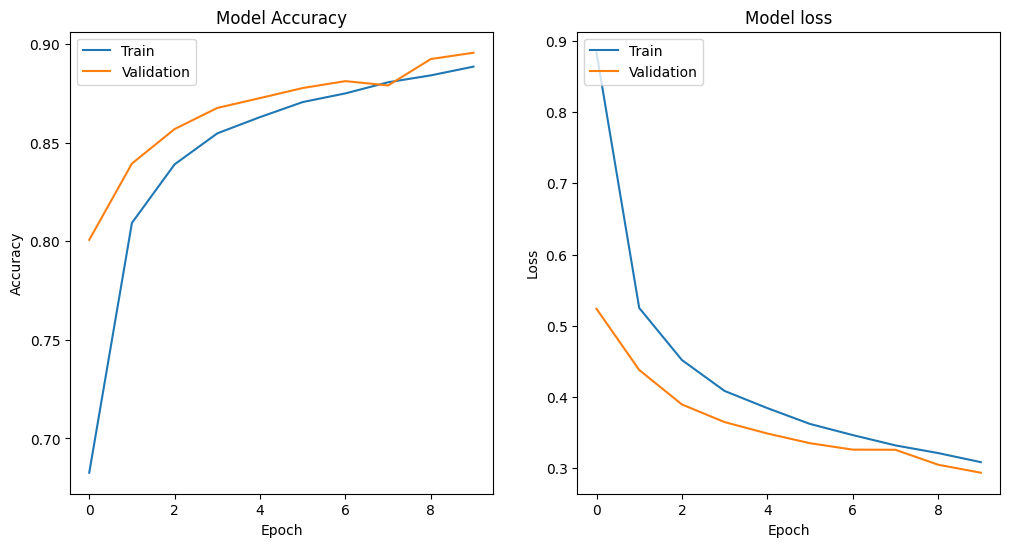

In [14]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))

# visualize accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# visualize loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [15]:
# recommendation based on purchases
# for simple assumptions, some users purchased an item

user_purchases = {
    'user1': [44],
    'user2': [68],
    'user3': [13],
}

# 최종 출력 이전 레이어에서 출력값을 받아옴 -> 이미지의 hidden representation 획득
model_without_last_layer = tf.keras.Model(model.inputs, model.layers[-2].output)

In [16]:
# most similar n items
num_similar_items = 5

# 비교를 위해, 전체 아이템 중 100개의 아이템 랜덤 샘플링
random_indices = np.random.choice(len(X_train), 100, replace=False)

# 각각 랜덤 샘플된 아이템으로부터 임베딩 계산
random_item_embeddings = model_without_last_layer(X_train[random_indices])

d:\projects\github\learning\recommendation\recommendation\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


In [17]:
random_item_embeddings[:1]

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[0.       , 0.       , 0.       , 1.0223463, 0.       , 0.       ,
        0.7289372, 0.       , 0.       , 0.       , 0.       , 4.3192177,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 3.732482 , 1.1397582,
        0.       , 0.       , 1.9590651, 1.2782815, 0.       , 2.1602755,
        0.       , 0.       , 0.       , 0.       , 0.       , 2.332746 ,
        1.5087879, 3.2542393, 0.       , 0.       , 4.7793083, 1.7588854,
        3.382844 , 0.       , 1.9000189, 0.       , 0.       , 0.       ,
        1.1754712, 0.       , 4.673989 , 0.       , 0.       , 0.       ,
        0.       , 0.       , 3.0158858, 1.1839389, 0.       , 0.       ,
        0.       , 0.       , 2.3527014, 5.0970473, 0.       , 1.6713691,
        0.       , 0.       , 0.       , 0.       , 1.8723412, 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       ,

In [27]:
random_item_embeddings.shape

TensorShape([100, 128])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Purchased item by user1


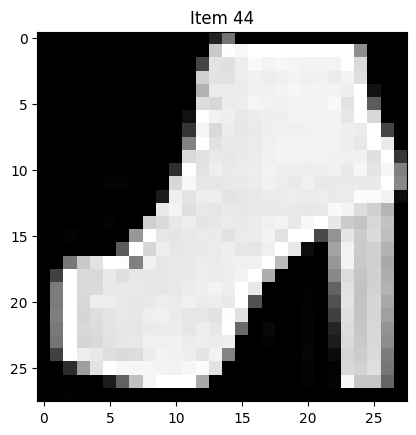

Most similar items to those purchased by user1 :


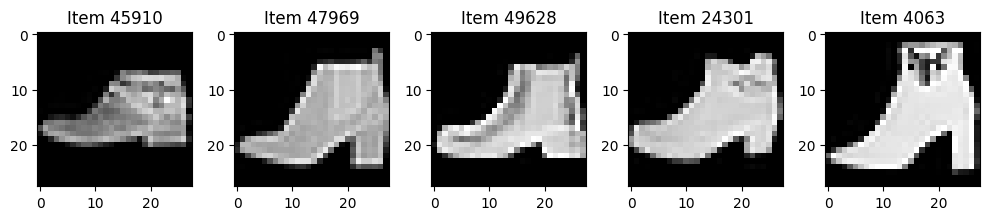

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

Purchased item by user2


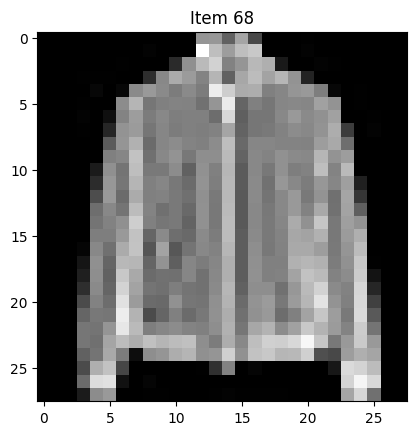

Most similar items to those purchased by user2 :


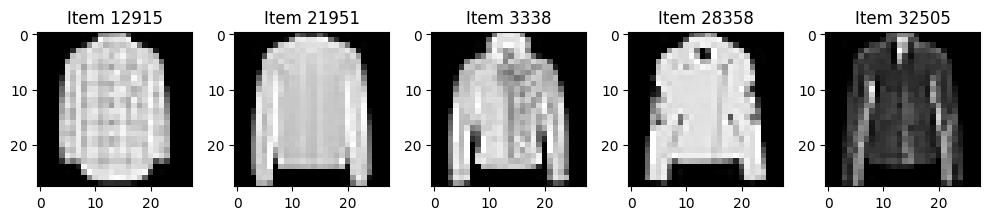

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Purchased item by user3


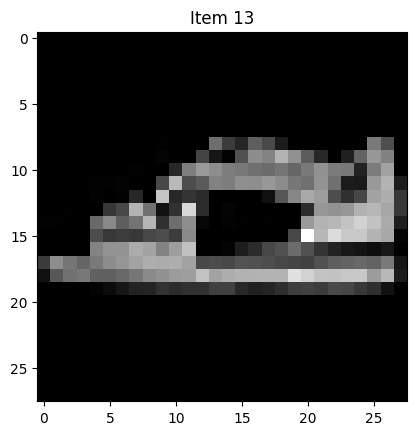

Most similar items to those purchased by user3 :


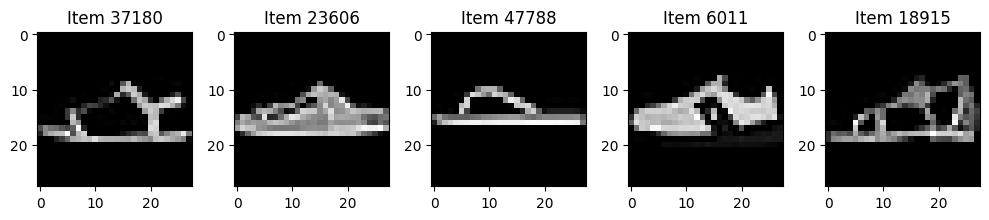

In [28]:
for user, item_indices in user_purchases.items():
    # calculating embedding of items which users purcahsed
    user_item_embeddings = model_without_last_layer.predict(X_train[np.array(item_indices)].reshape(-1, 28, 28, 1))
    
    # calculating similarity between user's items and random samples
    similarity = cosine_similarity(user_item_embeddings, random_item_embeddings)
    
    # the most similar n item indices
    top_similar_indices = np.argsort(similarity[0])[-num_similar_items:]
    
    # print images that users purchased
    print(f'\nPurchased item by {user}')
    plt.imshow(X_train[item_indices[0]].reshape(28, 28), cmap='gray')
    plt.title(f'Item {item_indices[0]}')
    plt.show()
    
    # print top n similar items
    print(f"Most similar items to those purchased by {user} :")
    fig, axes = plt.subplots(1, num_similar_items, figsize=(10, 10))
    for idx, ax in zip(top_similar_indices, axes.flatten()):
        # visualize
        ax.imshow(X_train[random_indices[idx]].reshape(28, 28), cmap='gray')
        ax.title.set_text(f'Item {random_indices[idx]}')
    plt.tight_layout()
    plt.show()

 85/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

d:\projects\github\learning\recommendation\recommendation\lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


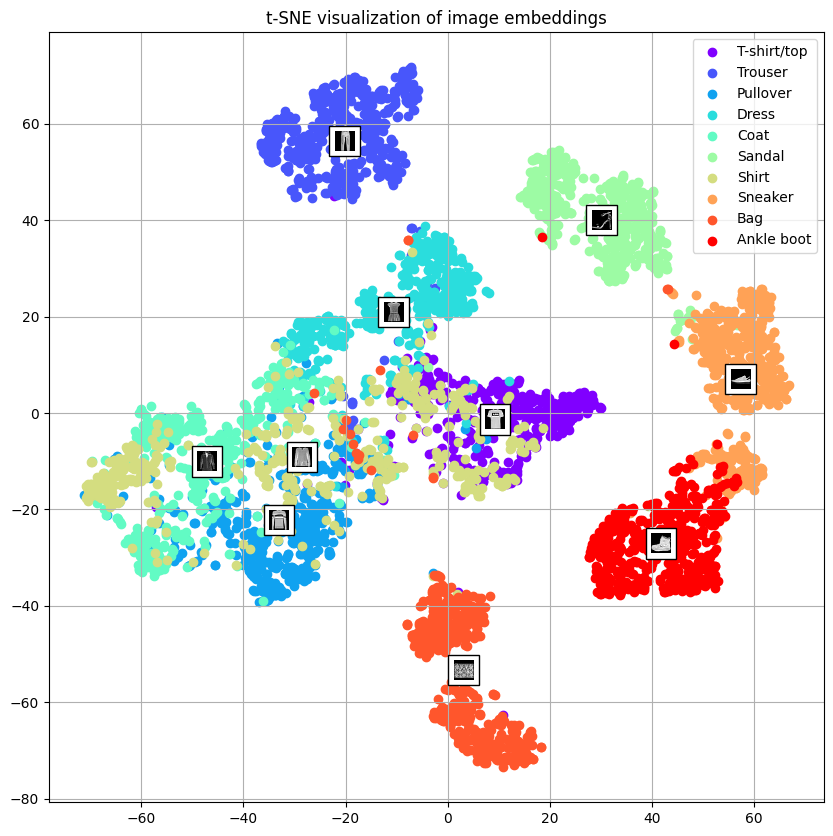

In [26]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm 

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy import ndimage

# get samples
subset_size = 5000
X_subset = X_train[:subset_size]
y_subset = y_train[:subset_size]

# create embeddings
subset_embeddings = model_without_last_layer.predict(X_subset)

# t-SNE for dimension reduction
tsne = TSNE(n_components=2, random_state=0)
subset_embeddings_2d = tsne.fit_transform(subset_embeddings)

# visualize
plt.figure(figsize=(10, 10))
colors = cm.rainbow(np.linspace(0, 1, num_classes))

for i in range(num_classes):
    idxs = (y_subset == i)
    centroid = np.mean(subset_embeddings_2d[idxs], axis=0)
    plt.scatter(subset_embeddings_2d[idxs, 0], subset_embeddings_2d[idxs, 1], color=colors[i], label=class_names[i])
    
    # locate an image at the centtoid
    imagebox = OffsetImage(X_subset[idxs][0].reshape(28, 28), zoom=0.5, cmap='gray')
    ab = AnnotationBbox(imagebox, centroid)
    plt.gca().add_artist(ab)
    
plt.legend(loc='best')
plt.title('t-SNE visualization of image embeddings')
plt.grid(True)
plt.show()